In [1]:
# install necessary packages
!pip install tensorflow keras transformers torch nltk plotly cufflinks wordcloud keras-tuner chart-studio tf-keras accelerate

In [2]:
# import required libraries
import tensorflow as tf
from tensorflow.keras.layers import LSTM
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from transformers import DistilBertForSequenceClassification
from keras.layers import Concatenate
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras import layers
from keras.callbacks import *
from keras.layers import *
from keras.models import Sequential,Model
import accelerate, torch
import kerastuner as kt
from transformers import TrainingArguments, Trainer

import transformers
from transformers import AutoTokenizer, TFAutoModel
from transformers import AutoConfig, AutoModel

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer,LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud,STOPWORDS
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
!pip install chart_studio
from IPython.display import HTML
import plotly
import cufflinks
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.express as px
import plotly.figure_factory as ff
from plotly.offline import iplot
from plotly.subplots import make_subplots

plotly.offline.init_notebook_mode(connected=True)
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

from string import punctuation
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

/var/folders/jk/8_y8h18x2p974rg6rxdbf_mm0000gn/T/ipykernel_10520/3297487811.py:23: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [3]:
# load the three datasets
df_cleaned_1 = pd.read_csv('review_dataset/Preprocessed_Dataset_1.csv')
df_cleaned_2 = pd.read_csv('review_dataset/Preprocessed_Dataset_2.csv')
df_cleaned_3 = pd.read_csv('review_dataset/Preprocessed_Dataset_3.csv')

df_cleaned_2.rename(columns={'label': 'target'}, inplace=True)

In [4]:
# Define a function for text preprocessing
def preprocess_data(df):
    # Replace NaN with empty strings and ensure all entries are strings
    df['Cleaned_text'] = df['Cleaned_text'].fillna('').astype(str)
    
    # Initialize the Tokenizer
    tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
    tokenizer.fit_on_texts(df['Cleaned_text'])
    
    # Convert texts to sequences
    sequences = tokenizer.texts_to_sequences(df['Cleaned_text'])
    
    # Pad sequences
    X = pad_sequences(sequences, padding='post', maxlen=100)
    
    # Define target variable
    y = df['target']
    
    return X, y, tokenizer

# Preprocess data for each dataset
X1, y1, tokenizer_1 = preprocess_data(df_cleaned_1)  # Preprocess first dataset
X2, y2, tokenizer_2 = preprocess_data(df_cleaned_2)  # Preprocess second dataset
X3, y3, tokenizer_3 = preprocess_data(df_cleaned_3)  # Preprocess third dataset

# Split the data into training and testing sets (80% training, 20% testing)
# Dataset-1 splitting
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
# Dataset-2 splitting
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
# Dataset-2 splitting
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size=0.2, random_state=42)



=== Processing Dataset 1 ===
Training with optimizer=ADAM, epochs=5
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step
Training with optimizer=ADAM, epochs=10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step
Training with optimizer=SGD, epochs=5
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step
Training with optimizer=SGD, epochs=10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step

Dataset 1 - All Results:
Optimizer  Epochs  Accuracy  F1 Score    AUC
     ADAM       5    0.7518    0.7532 0.8419
     ADAM      10    0.7842    0.7852 0.8583
      SGD       5    0.4216    0.2500 0.5966
      SGD      10    0.4216    0.2500 0.6063


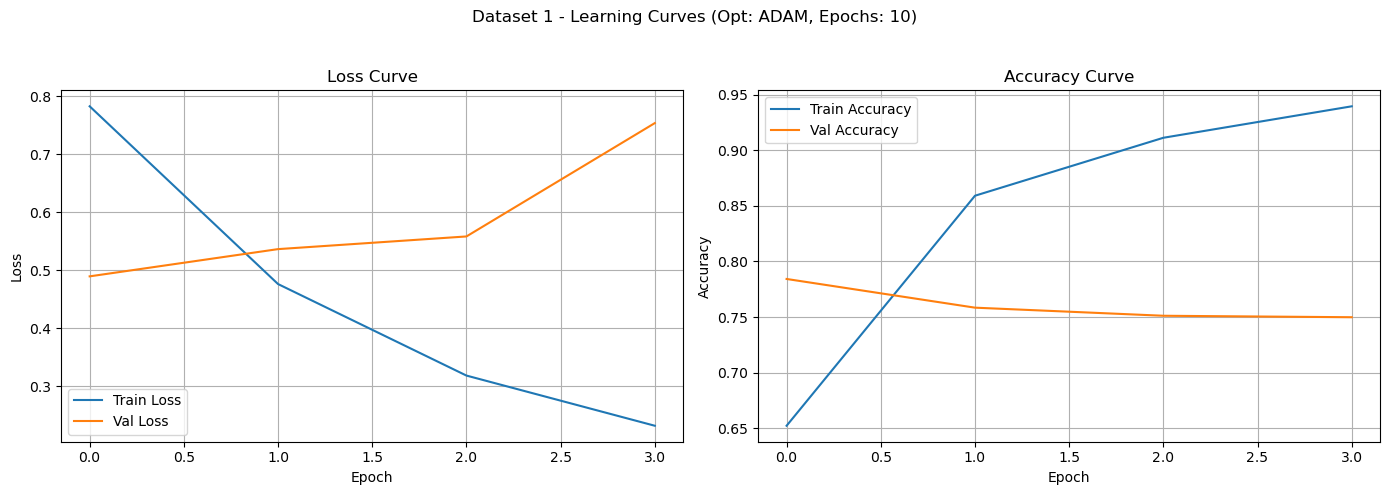

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step


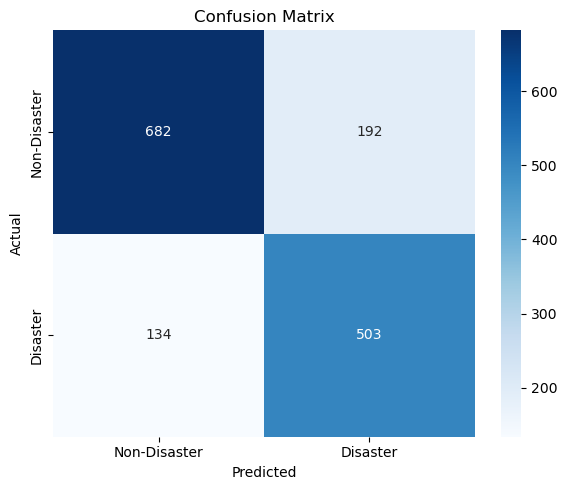

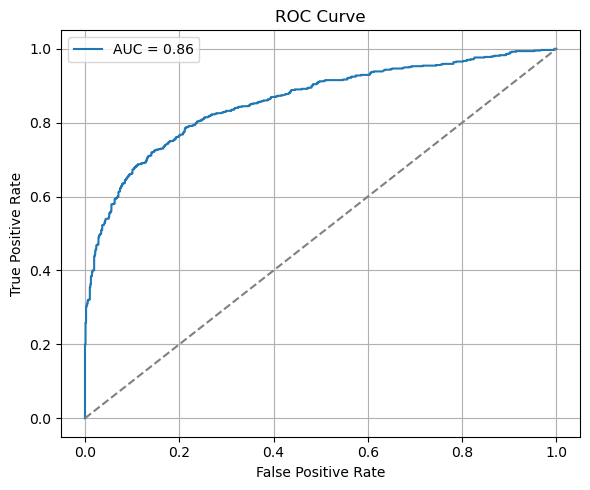


Dataset 1 - Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       874
           1       0.72      0.79      0.76       637

    accuracy                           0.78      1511
   macro avg       0.78      0.78      0.78      1511
weighted avg       0.79      0.78      0.79      1511


Best Model for Dataset 1:
- Optimizer: ADAM
- Epochs: 10
- Accuracy: 0.7842
- F1 Score: 0.7852
- AUC: 0.8583


=== Processing Dataset 2 ===
Training with optimizer=ADAM, epochs=5
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
Training with optimizer=ADAM, epochs=10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Training with optimizer=SGD, epochs=5
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Training with optimizer=SGD, epochs=10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step

Dataset 2 - All Re

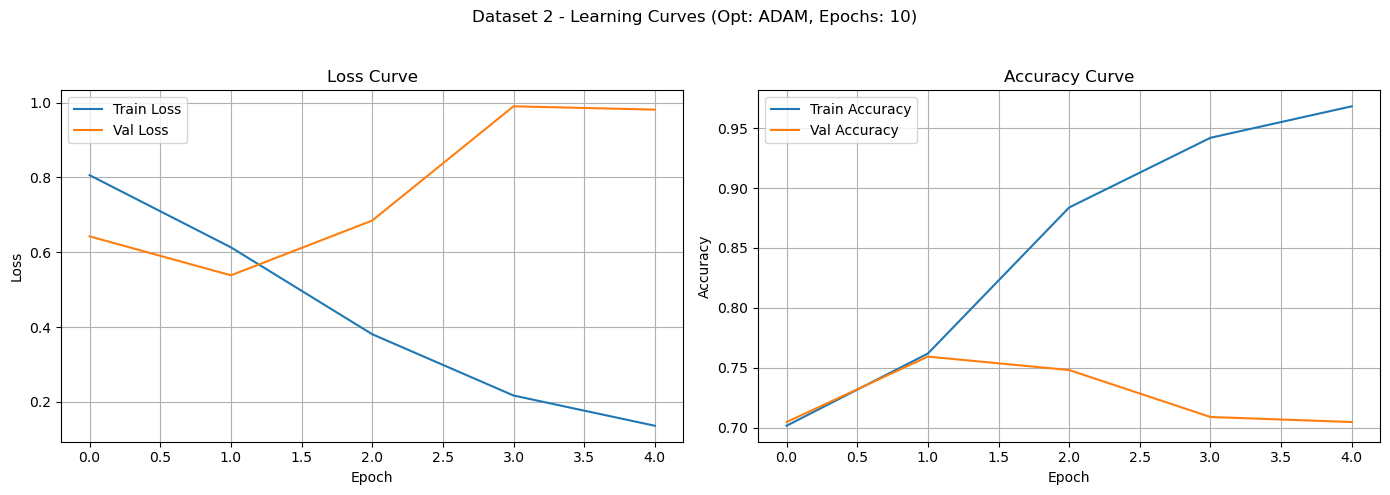

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


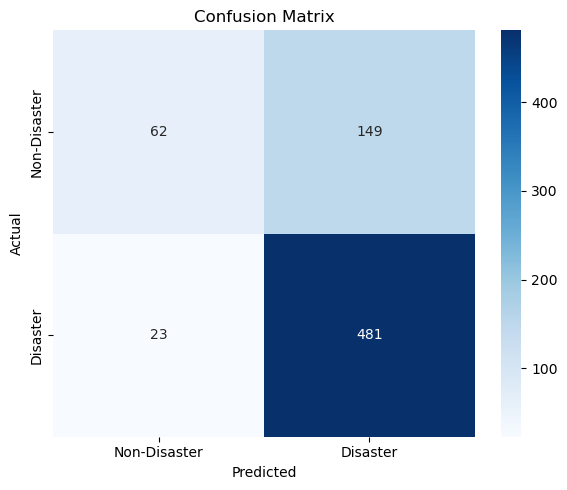

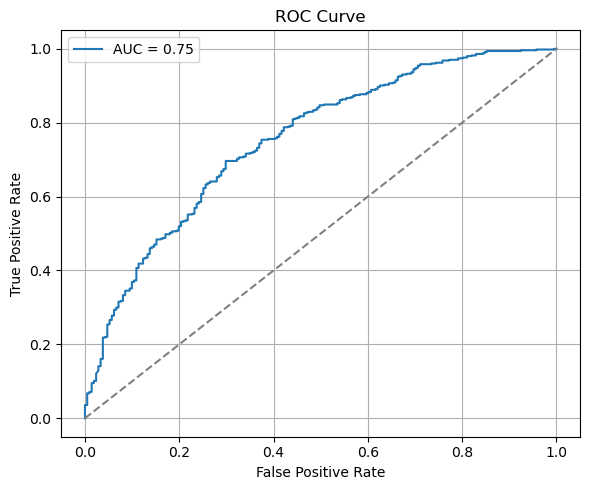


Dataset 2 - Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.29      0.42       211
           1       0.76      0.95      0.85       504

    accuracy                           0.76       715
   macro avg       0.75      0.62      0.63       715
weighted avg       0.75      0.76      0.72       715


Best Model for Dataset 2:
- Optimizer: ADAM
- Epochs: 10
- Accuracy: 0.7594
- F1 Score: 0.7216
- AUC: 0.7533


=== Processing Dataset 3 ===
Training with optimizer=ADAM, epochs=5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step
Training with optimizer=ADAM, epochs=10
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step
Training with optimizer=SGD, epochs=5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step
Training with optimizer=SGD, epochs=10
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step

Dataset 3 - All Re

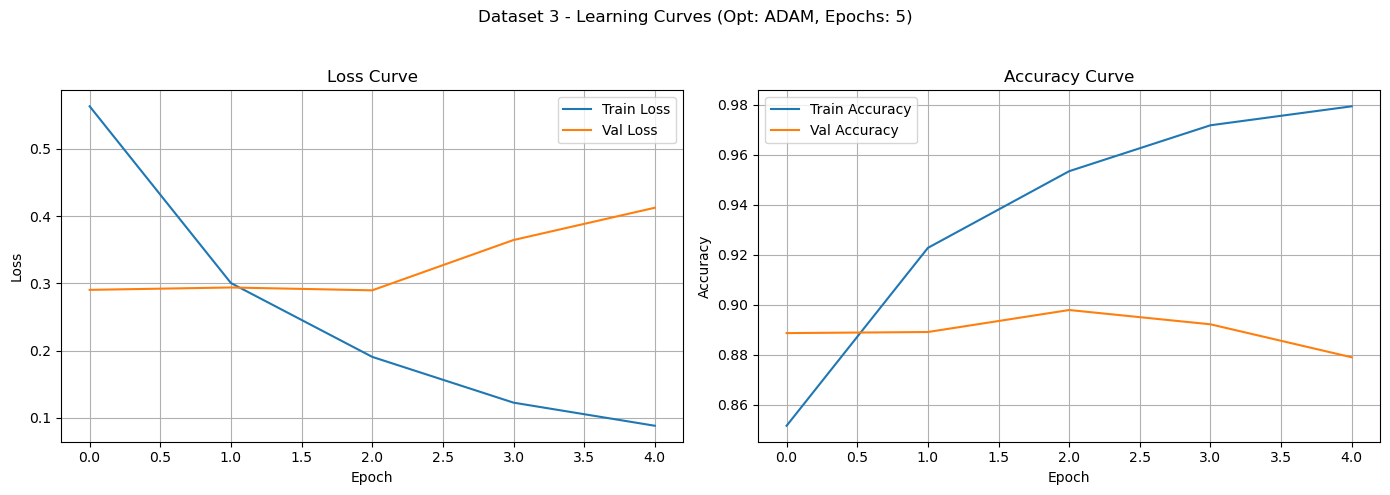

72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step


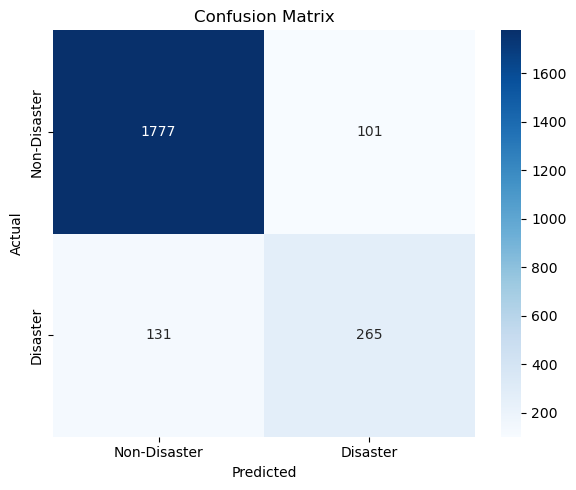

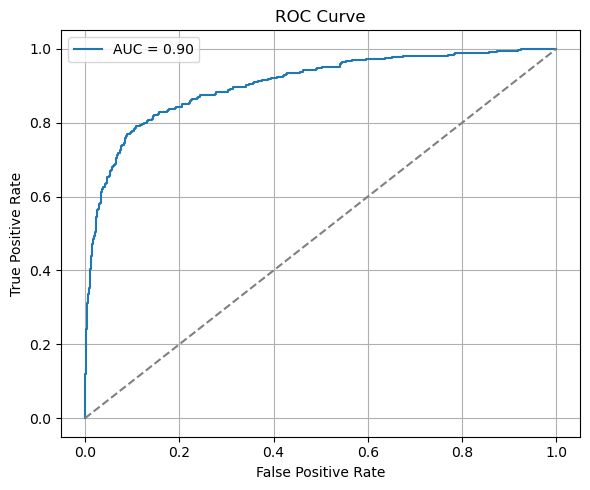


Dataset 3 - Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1878
           1       0.72      0.67      0.70       396

    accuracy                           0.90      2274
   macro avg       0.83      0.81      0.82      2274
weighted avg       0.90      0.90      0.90      2274


Best Model for Dataset 3:
- Optimizer: ADAM
- Epochs: 5
- Accuracy: 0.8980
- F1 Score: 0.8964
- AUC: 0.9043


In [5]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure output directory exists
output_dir = "model_results"
os.makedirs(output_dir, exist_ok=True)

def plot_confusion_matrix(cm, labels, filename):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()

def plot_roc_curve(fpr, tpr, auc_score, filename):
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()

def plot_learning_curve(history, dataset_name, optimizer, epochs, filename):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Loss curve
    ax1.plot(history.history['loss'], label='Train Loss')
    ax1.plot(history.history['val_loss'], label='Val Loss')
    ax1.set_title('Loss Curve')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    # Accuracy curve
    ax2.plot(history.history['accuracy'], label='Train Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Val Accuracy')
    ax2.set_title('Accuracy Curve')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    fig.suptitle(f"{dataset_name} - Learning Curves (Opt: {optimizer.upper()}, Epochs: {epochs})")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(filename)
    plt.show()
    plt.close()

def create_lstm_model(optimizer='adam', class_weight=None):
    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=64, input_length=100))
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Loop through datasets and perform training & evaluation
datasets = [
    ("Dataset 1", X_train_1, y_train_1, X_test_1, y_test_1),
    ("Dataset 2", X_train_2, y_train_2, X_test_2, y_test_2),
    ("Dataset 3", X_train_3, y_train_3, X_test_3, y_test_3)
]

optimizers = ['adam','sgd']
epochs_list = [5,10]

for dataset_name, X_train, y_train, X_test, y_test in datasets:
    print(f"\n\n=== Processing {dataset_name} ===")
    results = []

    for opt in optimizers:
        for ep in epochs_list:
            print(f"Training with optimizer={opt.upper()}, epochs={ep}")
            model = create_lstm_model(optimizer=opt)
            early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

            class_weight = {0: 1., 1: 2.}

            history = model.fit(
                X_train, y_train,
                validation_data=(X_test, y_test),
                epochs=ep,
                batch_size=32,
                callbacks=[early_stop],
                class_weight=class_weight,
                verbose=0
            )

            y_pred = (model.predict(X_test) > 0.5).astype(int)
            acc = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average="weighted")
            fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
            auc_score_val = auc(fpr, tpr)

            results.append({
                'optimizer': opt,
                'epochs': ep,
                'accuracy': acc,
                'f1': f1,
                'auc': auc_score_val,
                'history': history,
                'model': model,
                'fpr': fpr,
                'tpr': tpr
            })

    # Convert results to DataFrame and display
    results_df = pd.DataFrame([
        {
            'Optimizer': r['optimizer'].upper(),
            'Epochs': r['epochs'],
            'Accuracy': round(r['accuracy'], 4),
            'F1 Score': round(r['f1'], 4),
            'AUC': round(r['auc'], 4)
        }
        for r in results
    ])
    print(f"\n{dataset_name} - All Results:")
    print(results_df.to_string(index=False))

    # Best model selection
    best_result = max(results, key=lambda x: x['accuracy'])
    best_model = best_result['model']
    best_opt = best_result['optimizer']
    best_ep = best_result['epochs']

    base_filename = f"{dataset_name.replace(' ', '_')}_Opt-{best_opt}_Ep-{best_ep}"

    # Learning Curve
    plot_learning_curve(best_result['history'], dataset_name, best_opt, best_ep,
                        os.path.join(output_dir, f"{base_filename}_learning_curve.png"))

    # Confusion Matrix
    y_pred = (best_model.predict(X_test) > 0.5).astype(int)
    conf_matrix = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf_matrix, labels=["Non-Disaster", "Disaster"],
                          filename=os.path.join(output_dir, f"{base_filename}_confusion_matrix.png"))

    # ROC Curve
    plot_roc_curve(best_result['fpr'], best_result['tpr'], best_result['auc'],
                   filename=os.path.join(output_dir, f"{base_filename}_roc.png"))

    # Classification Report
    class_report = classification_report(y_test, y_pred)
    print(f"\n{dataset_name} - Classification Report:\n", class_report)

    print(f"\nBest Model for {dataset_name}:\n- Optimizer: {best_opt.upper()}\n- Epochs: {best_ep}")
    print(f"- Accuracy: {best_result['accuracy']:.4f}\n- F1 Score: {best_result['f1']:.4f}\n- AUC: {best_result['auc']:.4f}")